In [1]:
import pandas as pd
import os
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import tensorflow as tf

from numpy import mean
from numpy import std

from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from tensorflow import keras
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection
from sklearn.linear_model import Ridge

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [2]:
current_directory = os.getcwd()
print("Current Directory:", current_directory)
df_dims = pd.read_excel('dataframe_withdims.xlsx')
df_AAL = pd.read_excel('ALLabsoluteloading_postMOSAEC.xlsx')

Current Directory: C:\Users\Kshitij Tiwari


In [3]:
keywords = df_dims['MOF'].tolist();
df_AAL['Matched'] = df_AAL['MOF'].str.contains('|'.join(keywords), case=False)

In [4]:
matched_rows = df_AAL[df_AAL['Matched'] == True]
#matched_rows.to_excel('matched_file.xlsx', index=False)
combined_df = pd.merge(df_dims, matched_rows, on='MOF', how='inner')
combined_df.to_excel('combined_matched_rows.xlsx', index=False)

In [5]:
#print('matched_file.xlsx')
#features = df_newcolumns.tolist()
df_new = pd.read_excel('combined_matched_rows.xlsx')
df_new.head()

,MOF,PLD,LCD,Density (g/cc),VSA (m2/cc),GSA (m2/g),VF,PV (cc/g),K0_CH4,K0_CO2,...,CH4 loading (mol/kg),CO2 error (mol/kg),CH4 error (mol/kg),Selectivity (CO2),Selectivity error,TSN,logS error,TSN error,logS,Matched
0,RAHRUP_stripped.cif,3.86749,4.67492,1.50461,372.975,247.887,0.45690,0.303666,0.000010,2.046880,...,0.014163,0.030273,0.008577,228.666415,138.498648,7.640361,0.263043,0.854864,2.359202,True
1,JUWSUR_stripped.cif,4.94079,5.62912,1.79242,972.291,542.446,0.49170,0.274322,0.000008,0.000402,...,0.236155,0.022050,0.052643,15.437307,3.442527,4.333045,0.096848,0.354039,1.188572,True
2,ABEXIQ_stripped.cif,4.07988,4.80036,1.78760,605.013,338.450,0.48434,0.270944,0.000005,0.045327,...,0.021570,0.029571,0.002536,199.506435,23.494075,9.897497,0.051143,0.230354,2.299957,True
3,TANBIV_stripped.cif,4.00937,5.61624,1.45419,552.742,380.103,0.51474,0.353971,0.000011,438.327000,...,0.201083,0.050844,0.011112,22.864171,1.288542,6.248846,0.024475,0.132053,1.359155,True
4,ABEXOW_stripped.cif,4.04136,4.77169,1.81243,582.737,321.522,0.47998,0.264826,0.000005,0.018944,...,0.021082,0.028442,0.001810,201.859797,17.384624,9.809360,0.037402,0.172143,2.305050,True


In [6]:
#cleaning the data
df_new.dropna(inplace=True) #DATA IMPUTATION, i.e. dealing with missing values

In [7]:
columns_sc = ["PLD", "LCD", "Density (g/cc)", "VSA (m2/cc)", "GSA (m2/g)", "VF ", "PV (cc/g)", "K0_CH4","K0_CO2","K0_H2S","K0_H20","DC_CH4","DC_CO2","DC_H2S","P_CH4","P_CH4","P_CO2","P_H2S","Qst_CH4","Qst_CO2","Qst_H2S","Qst_H2O","Maximum Dimensions"]
#POWER TRANSFORMER INIT
r_scale = df_new[columns_sc]
scaler = PowerTransformer()
r_scaled_df = scaler.fit_transform(r_scale) 
df_new[columns_sc] = r_scaled_df

In [8]:
X = df_new[['PLD', 'LCD', 'Density (g/cc)', 'VSA (m2/cc)', 'GSA (m2/g)', "VF ", 'PV (cc/g)', 'K0_CH4','K0_CO2','K0_H2S','K0_H20','DC_CH4','DC_CO2','DC_H2S','P_CH4','P_CH4','P_CO2','P_H2S','Qst_CH4','Qst_CO2','Qst_H2S','Qst_H2O','Maximum Dimensions']]
Y = df_new[['logS']]

#print(X.shape)
#print(Y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

estimator = RandomForestRegressor() 
rfe = RFE(estimator, n_features_to_select=16)  
rfe.fit(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = rfe.support_

# Subset the training and testing data with the selected features
X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]

C:\Users\Kshitij Tiwari\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\Kshitij Tiwari\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\Kshitij Tiwari\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\Kshitij Tiwari\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A

Epoch 1/50
67/67 [==============================] - 1s 10ms/step - loss: 2.8728 - mean_absolute_error: 0.2619 - val_loss: 1.0537 - val_mean_absolute_error: 0.1749
Epoch 2/50
67/67 [==============================] - 0s 5ms/step - loss: 0.6559 - mean_absolute_error: 0.1861 - val_loss: 0.4042 - val_mean_absolute_error: 0.1585
Epoch 3/50
67/67 [==============================] - 0s 5ms/step - loss: 0.3145 - mean_absolute_error: 0.1587 - val_loss: 0.2415 - val_mean_absolute_error: 0.1463
Epoch 4/50
67/67 [==============================] - 0s 5ms/step - loss: 0.2069 - mean_absolute_error: 0.1498 - val_loss: 0.2305 - val_mean_absolute_error: 0.2135
Epoch 5/50
67/67 [==============================] - 0s 5ms/step - loss: 0.1671 - mean_absolute_error: 0.1627 - val_loss: 0.1354 - val_mean_absolute_error: 0.1418
Epoch 6/50
67/67 [==============================] - 0s 5ms/step - loss: 0.1321 - mean_absolute_error: 0.1545 - val_loss: 0.1166 - val_mean_absolute_error: 0.1410
Epoch 7/50
67/67 [=========

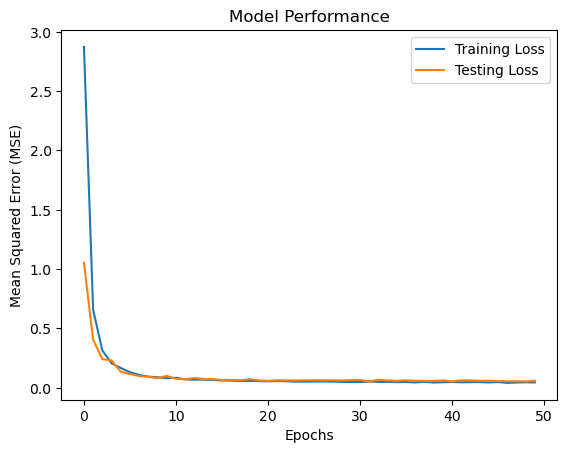

29/29 [==============================] - 0s 1ms/step


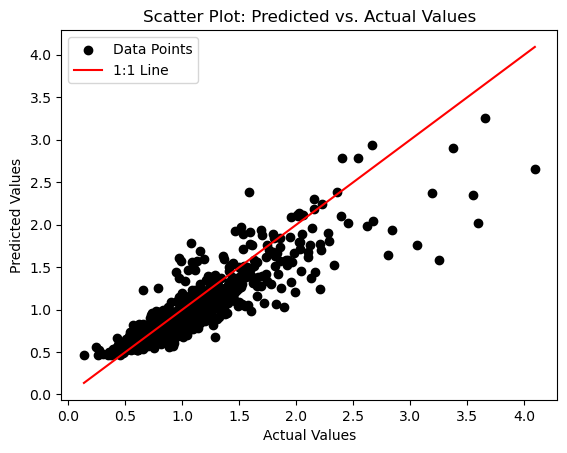

Epoch 1/50
67/67 [==============================] - 1s 9ms/step - loss: 2.8266 - mean_absolute_error: 0.2665 - val_loss: 1.0373 - val_mean_absolute_error: 0.1975
Epoch 2/50
67/67 [==============================] - 0s 5ms/step - loss: 0.6312 - mean_absolute_error: 0.1786 - val_loss: 0.3836 - val_mean_absolute_error: 0.1526
Epoch 3/50
67/67 [==============================] - 0s 5ms/step - loss: 0.3067 - mean_absolute_error: 0.1685 - val_loss: 0.2283 - val_mean_absolute_error: 0.1417
Epoch 4/50
67/67 [==============================] - 0s 5ms/step - loss: 0.2049 - mean_absolute_error: 0.1582 - val_loss: 0.1844 - val_mean_absolute_error: 0.1692
Epoch 5/50
67/67 [==============================] - 0s 5ms/step - loss: 0.1510 - mean_absolute_error: 0.1501 - val_loss: 0.1413 - val_mean_absolute_error: 0.1774
Epoch 6/50
67/67 [==============================] - 0s 5ms/step - loss: 0.1301 - mean_absolute_error: 0.1608 - val_loss: 0.1146 - val_mean_absolute_error: 0.1408
Epoch 7/50
67/67 [==========

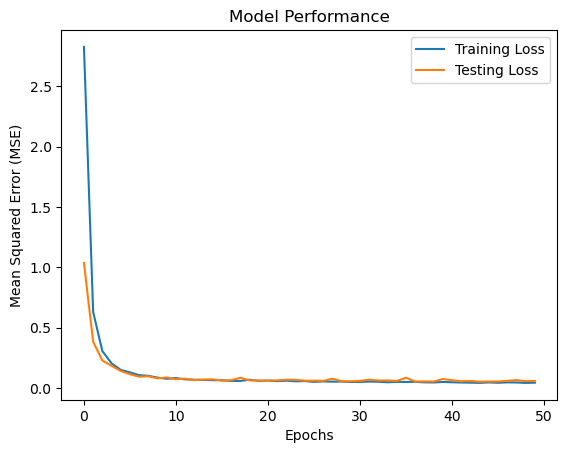

29/29 [==============================] - 0s 2ms/step


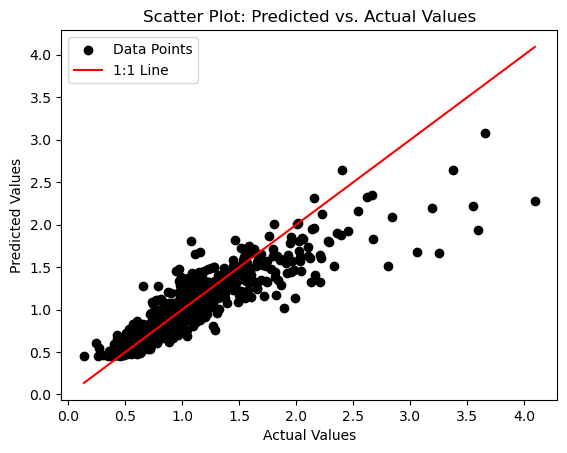

Epoch 1/50
67/67 [==============================] - 1s 10ms/step - loss: 2.7598 - mean_absolute_error: 0.2605 - val_loss: 0.9681 - val_mean_absolute_error: 0.1871
Epoch 2/50
67/67 [==============================] - 0s 5ms/step - loss: 0.5732 - mean_absolute_error: 0.1722 - val_loss: 0.3556 - val_mean_absolute_error: 0.1627
Epoch 3/50
67/67 [==============================] - 0s 5ms/step - loss: 0.2840 - mean_absolute_error: 0.1694 - val_loss: 0.2134 - val_mean_absolute_error: 0.1561
Epoch 4/50
67/67 [==============================] - 0s 5ms/step - loss: 0.1895 - mean_absolute_error: 0.1576 - val_loss: 0.1571 - val_mean_absolute_error: 0.1429
Epoch 5/50
67/67 [==============================] - 0s 4ms/step - loss: 0.1417 - mean_absolute_error: 0.1520 - val_loss: 0.1247 - val_mean_absolute_error: 0.1416
Epoch 6/50
67/67 [==============================] - 0s 5ms/step - loss: 0.1258 - mean_absolute_error: 0.1579 - val_loss: 0.1405 - val_mean_absolute_error: 0.2028
Epoch 7/50
67/67 [=========

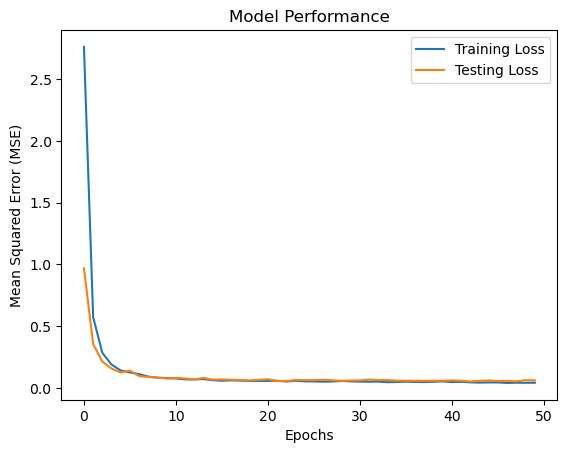

29/29 [==============================] - 0s 2ms/step


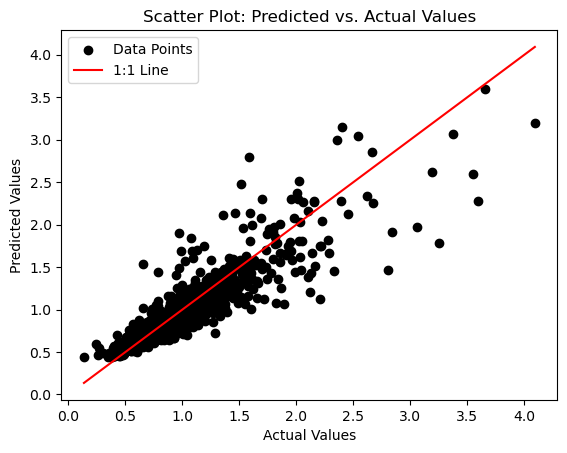

Epoch 1/50
67/67 [==============================] - 1s 10ms/step - loss: 2.8452 - mean_absolute_error: 0.2706 - val_loss: 1.0396 - val_mean_absolute_error: 0.1856
Epoch 2/50
67/67 [==============================] - 0s 5ms/step - loss: 0.6304 - mean_absolute_error: 0.1796 - val_loss: 0.3845 - val_mean_absolute_error: 0.1693
Epoch 3/50
67/67 [==============================] - 0s 5ms/step - loss: 0.3075 - mean_absolute_error: 0.1755 - val_loss: 0.2293 - val_mean_absolute_error: 0.1531
Epoch 4/50
67/67 [==============================] - 0s 5ms/step - loss: 0.1951 - mean_absolute_error: 0.1551 - val_loss: 0.1658 - val_mean_absolute_error: 0.1455
Epoch 5/50
67/67 [==============================] - 0s 5ms/step - loss: 0.1490 - mean_absolute_error: 0.1509 - val_loss: 0.1265 - val_mean_absolute_error: 0.1391
Epoch 6/50
67/67 [==============================] - 0s 5ms/step - loss: 0.1234 - mean_absolute_error: 0.1514 - val_loss: 0.1190 - val_mean_absolute_error: 0.1455
Epoch 7/50
67/67 [=========

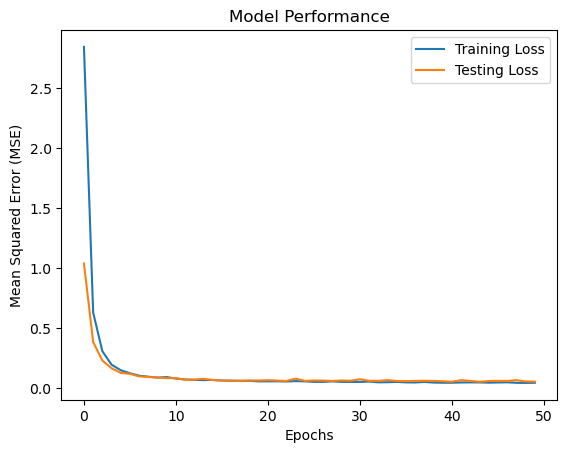

29/29 [==============================] - 0s 2ms/step


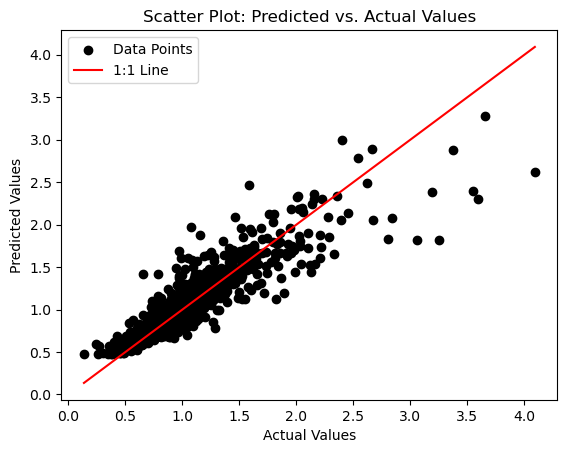

Epoch 1/50
67/67 [==============================] - 1s 11ms/step - loss: 2.9280 - mean_absolute_error: 0.2640 - val_loss: 1.1318 - val_mean_absolute_error: 0.1769
Epoch 2/50
67/67 [==============================] - 0s 5ms/step - loss: 0.7051 - mean_absolute_error: 0.1796 - val_loss: 0.4355 - val_mean_absolute_error: 0.1497
Epoch 3/50
67/67 [==============================] - 0s 6ms/step - loss: 0.3404 - mean_absolute_error: 0.1575 - val_loss: 0.2978 - val_mean_absolute_error: 0.2095
Epoch 4/50
67/67 [==============================] - 0s 6ms/step - loss: 0.2345 - mean_absolute_error: 0.1729 - val_loss: 0.1880 - val_mean_absolute_error: 0.1532
Epoch 5/50
67/67 [==============================] - 0s 6ms/step - loss: 0.1768 - mean_absolute_error: 0.1670 - val_loss: 0.1475 - val_mean_absolute_error: 0.1403
Epoch 6/50
67/67 [==============================] - 0s 5ms/step - loss: 0.1326 - mean_absolute_error: 0.1429 - val_loss: 0.1171 - val_mean_absolute_error: 0.1362
Epoch 7/50
67/67 [=========

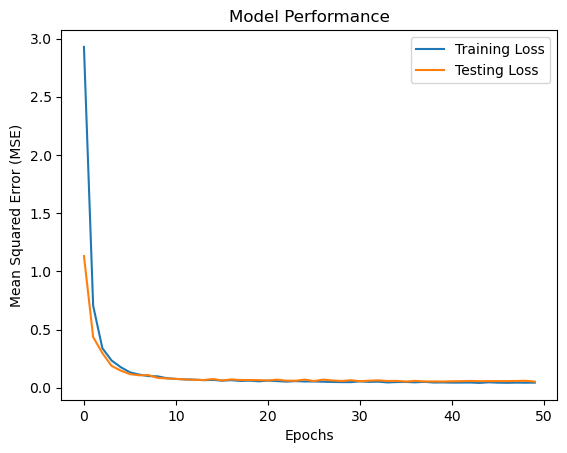

29/29 [==============================] - 0s 8ms/step


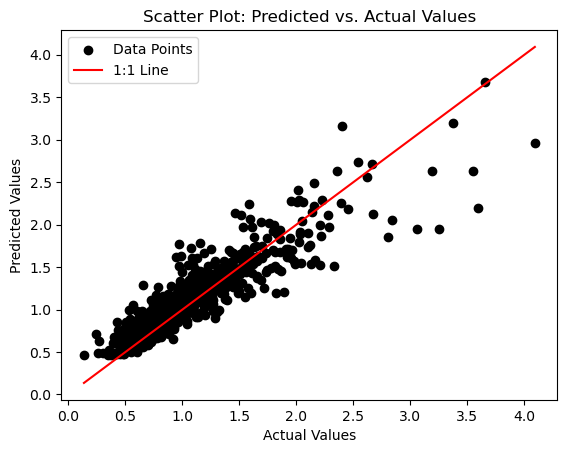

Epoch 1/50
67/67 [==============================] - 2s 20ms/step - loss: 2.8828 - mean_absolute_error: 0.2665 - val_loss: 1.0703 - val_mean_absolute_error: 0.1660
Epoch 2/50
67/67 [==============================] - 1s 10ms/step - loss: 0.6653 - mean_absolute_error: 0.1794 - val_loss: 0.4131 - val_mean_absolute_error: 0.1590
Epoch 3/50
67/67 [==============================] - 1s 8ms/step - loss: 0.3223 - mean_absolute_error: 0.1574 - val_loss: 0.2507 - val_mean_absolute_error: 0.1552
Epoch 4/50
67/67 [==============================] - 1s 9ms/step - loss: 0.2174 - mean_absolute_error: 0.1595 - val_loss: 0.1771 - val_mean_absolute_error: 0.1490
Epoch 5/50
67/67 [==============================] - 1s 18ms/step - loss: 0.1633 - mean_absolute_error: 0.1523 - val_loss: 0.1396 - val_mean_absolute_error: 0.1416
Epoch 6/50
67/67 [==============================] - 1s 11ms/step - loss: 0.1343 - mean_absolute_error: 0.1561 - val_loss: 0.1153 - val_mean_absolute_error: 0.1332
Epoch 7/50
67/67 [======

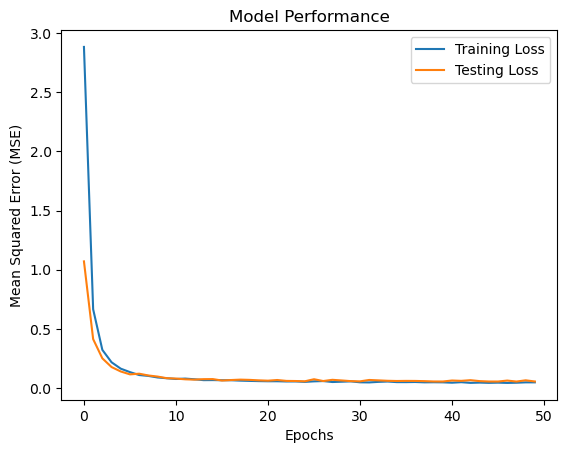

29/29 [==============================] - 0s 1ms/step


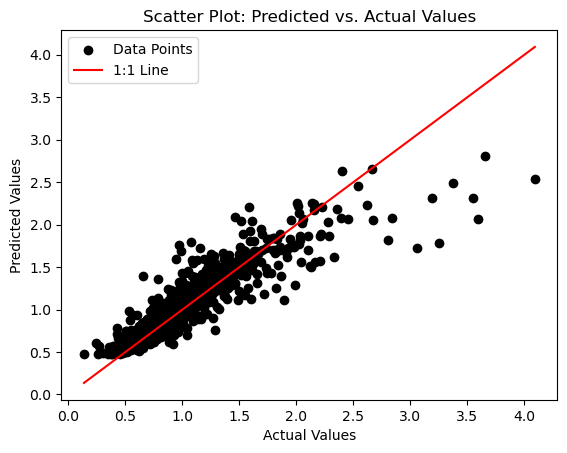

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.04463702067732811 - MAE: 11.410821974277496 - R2_Score: 0.8083935261082101%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.032433636486530304 - MAE: 9.859924763441086 - R2_Score: 0.8083935261082101%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.04152765870094299 - MAE: 11.65633499622345 - R2_Score: 0.8083935261082101%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.03495727479457855 - MAE: 9.76935401558876 - R2_Score: 0.8083935261082101%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.040065232664346695 - MAE: 11.99609562754631 - R2_Score: 0.8083935261082101%
------------------------------------------------------------------------
> 

"\nfig = plot_sequential_feature_selection(sfs.get_metric_dict(), kind='std_dev')\nplt.title('Sequential Forward Selection (SFS)')\nplt.xlabel('Number of Features')\nplt.ylabel('Performance')\nplt.show()\n"

In [9]:
# SEQUENTIAL FEATURE SELECTION BLOCK
"""
model = LinearRegression()
sfs = SequentialFeatureSelector(model, k_features=10, forward=True, floating=False, scoring='neg_mean_squared_error', cv=5)
sfs.fit(X_train, y_train)

selected_feature_indices = list(sfs.k_feature_idx_)

X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]
"""

num_folds = 6

acc_per_fold = []
loss_per_fold = []

inputs = np.concatenate((X_train_selected, X_test_selected), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

kfold = KFold(n_splits=num_folds, shuffle=True)
fold_no = 1
for train, test in kfold.split(X_train_selected, y_train):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=512, activation='relu',  kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(X_train_selected.shape[1],)))
    #model.add(keras.layers.Dropout(0.001))
    model.add(keras.layers.Dense(units=512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))  
    #model.add(keras.layers.Dropout(0.01))
    model.add(keras.layers.Dense(units=512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))) 
    #model.add(keras.layers.Dense(units=512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
    model.add(keras.layers.Dropout(0.1))
    model.add(keras.layers.Dense(units=512, activation='relu'))  #L2 regularization
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(units=1))

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
    #model.fit(X_train_selected, y_train, epochs=1000, batch_size=32, verbose=1)
    history = model.fit(X_train_selected, y_train, epochs=50, batch_size=32, validation_data=(X_test_selected, y_test), verbose=1)
    # Generate generalization metrics
    
    # Make predictions on the entire dataset
    #y_pred = model.predict(X_selected)
    
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    #print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]}%')
    
    test_r2 = r2_score(y_test, model.predict(X_test_selected))
    print(f"R2 Score: {test_r2}")
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1
    
    # Plot the training and testing performance over epochs
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Testing Loss')
    plt.title('Model Performance')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.legend()
    plt.show()
    
    # Assuming y_pred and y_actual are numpy arrays or pandas Series with the same length
    y_pred = model.predict(X_test_selected).flatten()  # Flatten predictions if necessary
    y_actual = y_test.values.flatten()  # Convert y_test to numpy array if it's a pandas Series

    # Check if the data is non-empty
    if len(y_actual) == 0 or len(y_pred) == 0:
        print("Error: Data is empty.")
    else:
        # Create the scatter plot
        plt.scatter(y_actual, y_pred, label="Data Points",c='black')
        plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', label="1:1 Line")
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.title("Scatter Plot: Predicted vs. Actual Values")
        plt.legend()
        plt.show()
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - MAE: {acc_per_fold[i]} - R2_Score: {test_r2}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> MAE: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> R2 Score: {np.mean(test_r2)}')
print('------------------------------------------------------------------------')

"""    
# Evaluate the model on training data
train_loss, train_mae = model.evaluate(X_train_selected, y_train, verbose=0)
train_r2 = r2_score(y_train, model.predict(X_train_selected))
print("Training set metrics:")
print(f"Mean Squared Error (MSE): {train_loss}")
print(f"Mean Absolute Error (MAE): {train_mae}")
print(f"R2 Score: {train_r2}")

# Evaluate the model on testing data
test_loss, test_mae = model.evaluate(X_test_selected, y_test, verbose=0)
test_r2 = r2_score(y_test, model.predict(X_test_selected))
print("Testing set metrics:")
print(f"Mean Squared Error (MSE): {test_loss}")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"R2 Score: {test_r2}")

"""

"""
fig = plot_sequential_feature_selection(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (SFS)')
plt.xlabel('Number of Features')
plt.ylabel('Performance')
plt.show()
"""

# Make predictions on new data
#predictions = model.predict(X_test)